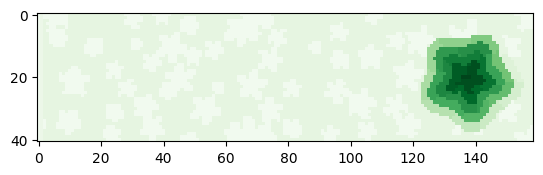

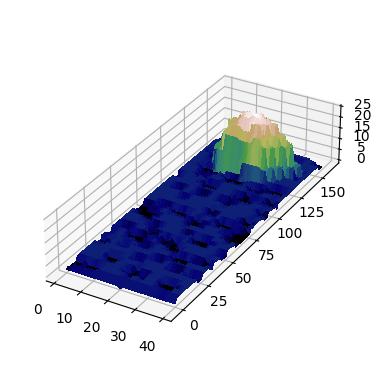

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import operator

data = np.array([[ord(letter)-97 for letter in line.replace("\n","")] for line in open('input.txt').readlines()])
x = np.array([[i for j in range(0,len(data[0]))] for i in range(0,len(data))])
y = np.array([[j for j in range(0,len(data[0]))] for i in range(0,len(data))])

start = (np.where(data == ord("S")-97)[0][0],np.where(data == ord("S")-97)[1][0])
data[start[0],start[1]] = -1
end = (np.where(data == ord("E")-97)[0][0],np.where(data == ord("E")-97)[1][0])
data[end[0],end[1]] = ord("z")-97

maxW = len(data[0])-1
maxH = len(data)-1

plt.imshow( data, cmap = 'Greens')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, data, cmap='gist_earth',linewidth=0, antialiased=False)
ax.set_box_aspect((4,10,2))  # aspect ratio is 1:1:1 in data space

def tupleAdd(t1,t2):
    return tuple(map(operator.add,t1, t2))

Goal Reached with path length: 504


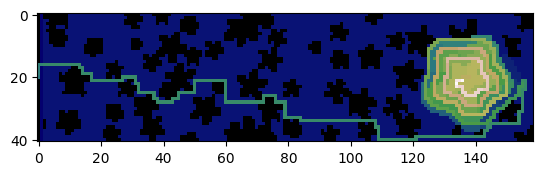

In [39]:
def p1():
    visited = []
    neighbours = [(start,0,[start])]
    movements = [(1,0),(-1,0),(0,1),(0,-1)]
 
    while len(neighbours) != 0:
        curr = neighbours.pop(0)
        for movement in movements:
            pos = tupleAdd(curr[0],movement)
            if not (pos[0] < 0 or pos[0] > maxH or pos[1] < 0 or pos[1] > maxW or pos in visited):
                if data[pos]-data[curr[0]] <= 1:
                    if pos == (20, 136):
                        print("Goal Reached with path length: " + str(curr[1]+1))
                        return curr[2]
                    neighbours.append((pos,curr[1]+1,curr[2]+[pos]))
                    visited.append(pos)
    
pathData = p1()
path = np.copy(data)

for step in pathData:
    path[step] += 10
    
plt.imshow(path, cmap = 'gist_earth')

Goal Reached with path length: 500


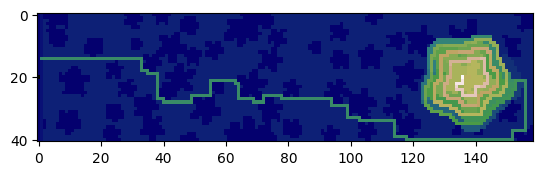

In [41]:
def p2():
    visited = []
    neighbours = [(end,0,[end])]
    movements = [(1,0),(-1,0),(0,1),(0,-1)]
 
    while len(neighbours) != 0:
        curr = neighbours.pop(0)
        for movement in movements:
            pos = tupleAdd(curr[0],movement)
            if not (pos[0] < 0 or pos[0] > maxH or pos[1] < 0 or pos[1] > maxW or pos in visited):
                if data[pos]-data[curr[0]] >= -1:
                    if data[pos] == 0:
                        print("Goal Reached with path length: " + str(curr[1]+1))
                        return curr[2]
                    neighbours.append((pos,curr[1]+1,curr[2]+[pos]))
                    visited.append(pos)
    
pathData = p2()
pathP2 = np.copy(data)

for step in pathData:
    pathP2[step] += 10
    
plt.imshow(pathP2, cmap = 'gist_earth')